In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


df_csv = pd.read_csv('/Users/isabellakleckner/Downloads/cleanedTrain.csv')
df = df_csv.dropna() 
df.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
3,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
5,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
7,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
9,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [230]:
#Printing datatypes 
print (df.dtypes)

User_ID                        object
Age                            object
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object


In [232]:
#Print the number of occurenances of each unique value in 'Dominant_Emotion' column
emotion_score = df['Dominant_Emotion'].value_counts()
print(emotion_score)

Dominant_Emotion
Happiness    200
Neutral      200
Anxiety      170
Sadness      160
Boredom      140
Anger        130
Name: count, dtype: int64


In [233]:
#Extract all column names
column_names = df.columns

#List
column_names_list = list(column_names)
print(column_names_list)

['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']


In [234]:
#Print the unique values in the 'Age' column
age_unique = df['Age'].unique()
print(age_unique)

['25' '30' '22' '28' '33' '21' '27' '24' '29' '31' '23' '26' '34' '35'
 '32']


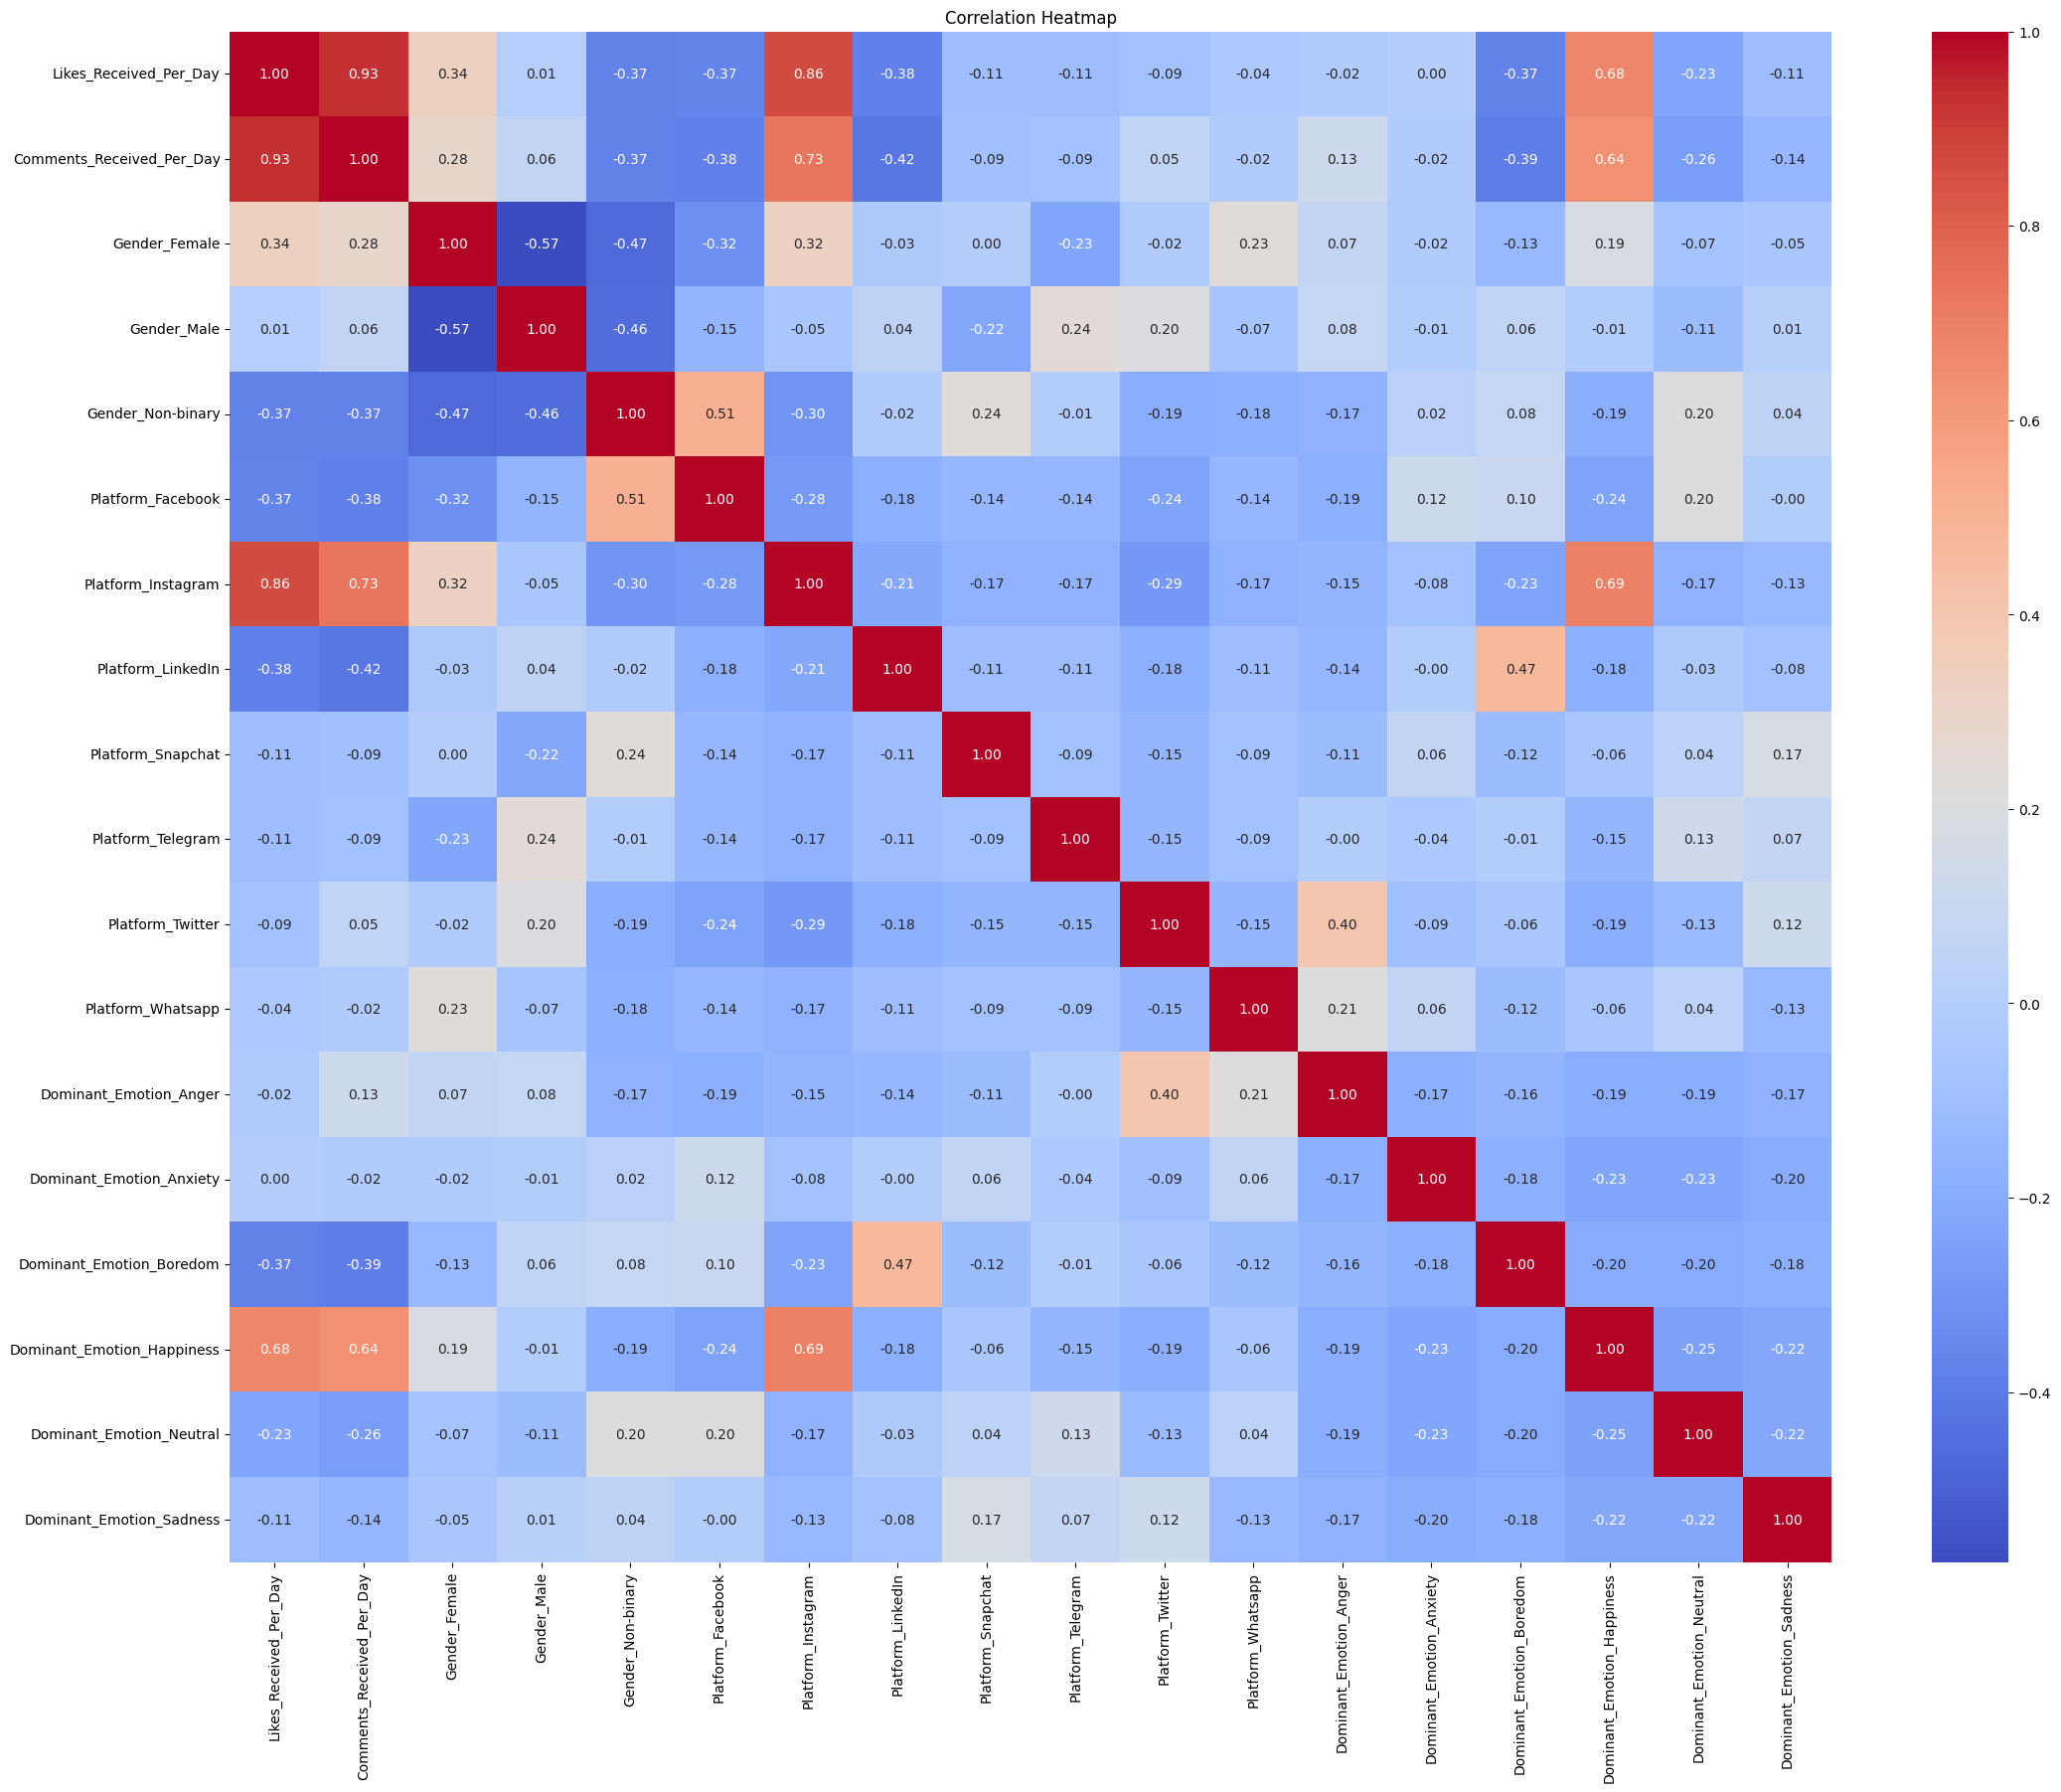

                            Likes_Received_Per_Day  Comments_Received_Per_Day  \
Likes_Received_Per_Day                    1.000000                   0.931057   
Comments_Received_Per_Day                 0.931057                   1.000000   
Gender_Female                             0.335074                   0.281236   
Gender_Male                               0.007638                   0.060984   
Gender_Non-binary                        -0.372650                  -0.371779   
Platform_Facebook                        -0.370332                  -0.381731   
Platform_Instagram                        0.861714                   0.732308   
Platform_LinkedIn                        -0.378266                  -0.419373   
Platform_Snapchat                        -0.105610                  -0.091525   
Platform_Telegram                        -0.112596                  -0.088598   
Platform_Twitter                         -0.088190                   0.054679   
Platform_Whatsapp           

In [241]:
#Select specific columns from the dataset 
final_df = df[[ 'Gender', 'Platform', 'Dominant_Emotion', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day']]
#One-hot encoding
final_df_encoded = pd.get_dummies(final_df, columns=[ 'Gender', 'Platform', 'Dominant_Emotion'], drop_first=False)
#Remove any duplicate columns
final_df_encoded = final_df_encoded.loc[:, ~final_df_encoded.columns.duplicated()]
#create correlation matrix
corr_matrix = final_df_encoded.corr()

plt.figure(figsize = (26,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f' )
plt.title('Correlation Heatmap')
plt.show()
print(corr_matrix)


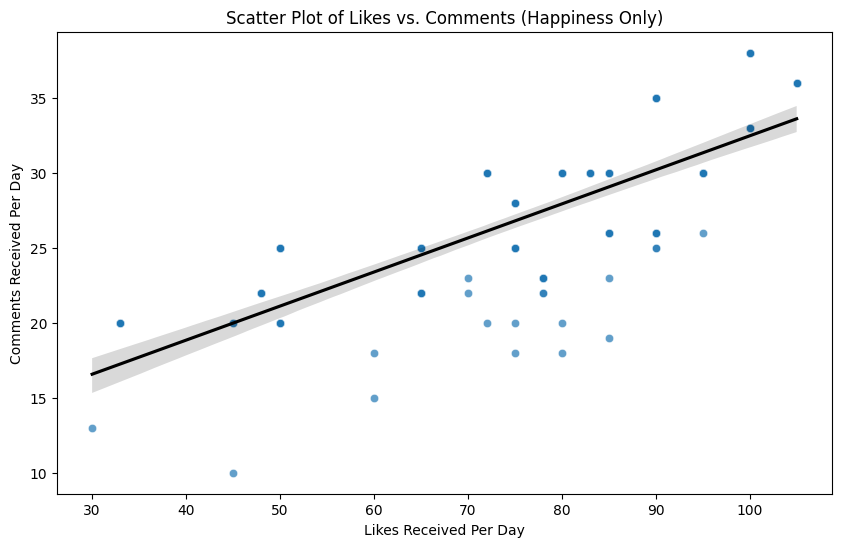

In [243]:
#Filter the df to include only rows where 'Dominant_Emotion' is 'Happiness'
happiness_df = final_df[final_df['Dominant_Emotion'] == 'Happiness']
#Scatter plot of Likes Received Per Day vs. Comments Received Per Day
plt.figure(figsize=(10, 6))
#Scatter plot
sns.scatterplot(data=happiness_df, x='Likes_Received_Per_Day', y='Comments_Received_Per_Day', alpha=0.7)
#Regression Line
sns.regplot(data=happiness_df, x='Likes_Received_Per_Day', y='Comments_Received_Per_Day', scatter=False, color='black')
plt.title('Scatter Plot of Likes vs. Comments (Happiness Only)')
plt.xlabel('Likes Received Per Day')
plt.ylabel('Comments Received Per Day')
plt.show()